### h2o Logistic Regression Test
##### Testing h2o

Reference: 
https://aichamp.wordpress.com/2017/09/29/python-example-of-building-glm-gbm-and-random-forest-binomial-model-with-h2o/

In [1]:
# import
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.152-b32, mixed mode)
  Starting server from C:\Users\FA279J\AppData\Local\Continuum\Anaconda2\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\fa279j\appdata\local\temp\tmpx8lezv
  JVM stdout: c:\users\fa279j\appdata\local\temp\tmpx8lezv\h2o_fa279j_started_from_python.out
  JVM stderr: c:\users\fa279j\appdata\local\temp\tmpx8lezv\h2o_fa279j_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_fa279j_d1gzq9
H2O cluster total nodes:,1
H2O cluster free memory:,1.754 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [2]:
### Data Reading

df = h2o.import_file("//txalle2cdfile25.itservices.sbc.com/APEXANALYTICS/Fahzy/prostate.csv")
df.dim
# df.summary() 
# df.col_names

Parse progress: |█████████████████████████████████████████████████████████| 100%


[380, 9]

In [3]:
# Setting up predictor variable set and response variable
y = 'CAPSULE'
x = df.col_names
x.remove(y)
print("Response = " + y)
print("Pridictors = " + str(x))

Response = CAPSULE
Pridictors = [u'ID', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [4]:
# Setting up a categorical variable
df['CAPSULE'] = df['CAPSULE'].asfactor()

In [5]:
# Testing CAPSULE levels
df['CAPSULE'].levels()

[['0', '1']]

In [6]:
# Splitting dataset into train and test
train, valid, test = df.split_frame(ratios=[.8, .1])
print(df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(380, 9)
(299, 9)
(40, 9)
(41, 9)


In [7]:
# Logistic Regression Run
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

glm_logistic = H2OGeneralizedLinearEstimator(family = "binomial")
glm_logistic.train(x=x, y= y, training_frame=train, validation_frame=valid, 
 model_id="glm_logistic")

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [8]:
# Extracting model's metrics
glm_logistic.varimp()

In [9]:
# Coefficient Estimates
glm_logistic.coef()

{u'AGE': 0.0033762700199670985,
 u'DCAPS': 0.525270891470381,
 u'DPROS': 0.5466168152748953,
 u'GLEASON': 1.0861606488270916,
 u'ID': 0.0024810812188741493,
 u'Intercept': -9.55066398070174,
 u'PSA': 0.022718008986971905,
 u'RACE': -0.5059956826906621,
 u'VOL': -0.013574967945790826}

In [10]:
# prediction on testing dataset:

glm_logistic.predict(test_data=test)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.626371,0.373629
0,0.953892,0.0461078
0,0.924728,0.0752722
0,0.763675,0.236325
0,0.835395,0.164605
1,0.495503,0.504497
1,0.0106154,0.989385
1,0.444309,0.555691
1,0.690385,0.309615
0,0.818858,0.181142


In [11]:
# checking the model performance metrics “rmse” based on testing and other datasets:

print(glm_logistic.model_performance(test_data=test).rmse())
print(glm_logistic.model_performance(test_data=valid).rmse())
print(glm_logistic.model_performance(test_data=train).rmse())

0.417634162646
0.419477580207
0.404825371757


In [12]:
# checking the model performance metrics “r2” based on testing and other datasets:

print(glm_logistic.model_performance(test_data=test).r2())
print(glm_logistic.model_performance(test_data=valid).r2())
print(glm_logistic.model_performance(test_data=train).r2())

0.281379529675
0.289044685673
0.314010858683


In [13]:
# Gradient Boosting Model:

from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm = H2OGradientBoostingEstimator()
gbm.train(x=x, y =y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
###  MODEL PERFORMANCE ###
# confusion metrics:

gbm.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.457658742606: 


,0,1,Error,Rate
0,176.0,5.0,0.0276,(5.0/181.0)
1,6.0,112.0,0.0508,(6.0/118.0)
Total,182.0,117.0,0.0368,(11.0/299.0)


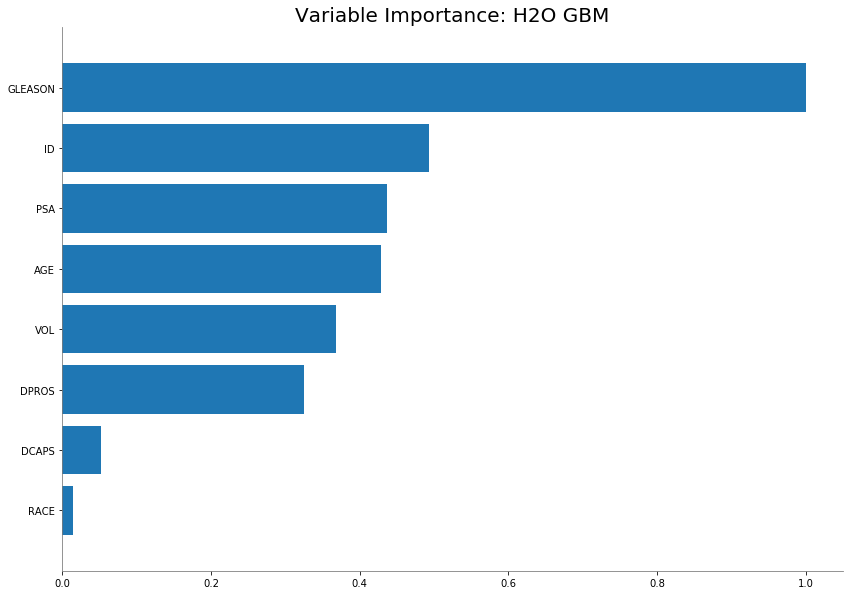

In [15]:
# variable importance plots:

gbm.varimp_plot()

In [16]:
# variable importance table:

gbm.varimp()

[(u'GLEASON', 88.96116638183594, 1.0, 0.3206714564415858),
 (u'ID', 43.849708557128906, 0.49290842668270285, 0.15806166307667294),
 (u'PSA', 38.87799072265625, 0.4370220434811469, 0.1401404951801774),
 (u'AGE', 38.17469024658203, 0.4291163414239646, 0.1376053621873075),
 (u'VOL', 32.717132568359375, 0.3677687006477868, 0.11793292487035537),
 (u'DPROS', 28.909204483032227, 0.32496431486688443, 0.1042067801399059),
 (u'DCAPS', 4.6713786125183105, 0.052510312111556476, 0.016838558263015058),
 (u'RACE', 1.2602593898773193, 0.014166399128222746, 0.0045427598409799996)]

In [17]:
# Distributed Random Forest model:

from h2o.estimators.random_forest import H2ORandomForestEstimator
drf = H2ORandomForestEstimator()
drf.train(x=x, y = y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [18]:
# random forest model's 'confusion metrics:

drf.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45: 


,0,1,Error,Rate
0,137.0,44.0,0.2431,(44.0/181.0)
1,36.0,82.0,0.3051,(36.0/118.0)
Total,173.0,126.0,0.2676,(80.0/299.0)


In [19]:
# gains and lift table:

drf.gains_lift()

Gains/Lift Table: Avg response rate: 39.46 %, avg score: 40.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100334,0.9565580,2.5338983,2.5338983,1.0,0.9861111,1.0,0.9861111,0.0254237,0.0254237,153.3898305,153.3898305
,2,0.0200669,0.9098701,1.6892655,2.1115819,0.6666667,0.9431792,0.8333333,0.9646452,0.0169492,0.0423729,68.9265537,111.1581921
,3,0.0301003,0.8830960,1.6892655,1.9708098,0.6666667,0.8995215,0.7777778,0.9429373,0.0169492,0.0593220,68.9265537,97.0809793
,4,0.0401338,0.8673333,2.5338983,2.1115819,1.0,0.8799020,0.8333333,0.9271785,0.0254237,0.0847458,153.3898305,111.1581921
,5,0.0501672,0.8639394,2.5338983,2.1960452,1.0,0.8666667,0.8666667,0.9150761,0.0254237,0.1101695,153.3898305,119.6045198
,6,0.1003344,0.7836627,1.6892655,1.9426554,0.6666667,0.8252473,0.7666667,0.8701617,0.0847458,0.1949153,68.9265537,94.2655367
,7,0.1505017,0.7290909,1.6892655,1.8581921,0.6666667,0.7640924,0.7333333,0.8348053,0.0847458,0.2796610,68.9265537,85.8192090
,8,0.2073579,0.6666667,1.6395813,1.7982504,0.6470588,0.6959200,0.7096774,0.7967238,0.0932203,0.3728814,63.9581256,79.8250410
,9,0.3043478,0.5714286,1.4853887,1.6985472,0.5862069,0.6057492,0.6703297,0.7358638,0.1440678,0.5169492,48.5388662,69.8547215
,10,0.4013378,0.4559123,1.4853887,1.6470339,0.5862069,0.5086263,0.65,0.6809481,0.1440678,0.6610169,48.5388662,64.7033898
